# Import Required Libraries
Import the necessary libraries, including `json` and `collections`.

In [ ]:
import json  # For working with JSON data
from collections import Counter  # For counting occurrences in categories

# Load and Parse JSON Data
Load the JSON data from the file and parse it into a Python dictionary.

In [ ]:
# Load and Parse JSON Data
with open('output.json', 'r') as file:
    json_data = json.load(file)  # Load JSON data from the file into a Python dictionary

# Verify the structure of the loaded data (optional)
# print(json_data)  # Uncomment this line to inspect the data structure

# Count Cookies by Category
Iterate through the JSON data to count cookies in each category using a dictionary or `collections.Counter`.

In [ ]:
# Count Cookies by Category
cookie_counts = Counter()  # Initialize a Counter to store counts of each category

# Iterate through the JSON data
for domain, cookies in json_data.items():
    if cookies:  # Ensure there are cookies for the domain
        for cookie in cookies:
            category = cookie.get('classification', 'Uncategorized')  # Default to 'Uncategorized' if no classification
            cookie_counts[category] += 1  # Increment the count for the category

# Display the counts for each category
cookie_counts

# Visualize Cookie Counts
Use a library like Matplotlib or Seaborn to create a bar chart showing the count of cookies in each category.

In [ ]:
import matplotlib.pyplot as plt  # For creating visualizations

# Extract categories and their counts from the Counter object
categories = list(cookie_counts.keys())
counts = list(cookie_counts.values())

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(categories, counts, color="skyblue")  # Create a bar chart with custom color

# Add labels and title
plt.xlabel("Cookie Categories", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Count of Cookies in Each Category", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Display the chart
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Render the bar chart

In [ ]:
import json
import matplotlib.pyplot as plt
from collections import Counter

def draw_histogram_for_cookie_of(cookie_type: str) -> None:
    # Load the JSON data
    file_path = "output.json"  # Adjust if necessary
    with open(file_path, "r") as f:
        data = json.load(f)

    # Count Marketing cookies per domain
    marketing_counts = []
    for domain, cookies in data.items():
        if isinstance(cookies, list):
            count = sum(1 for cookie in cookies if cookie.get("classification") == cookie_type)
            marketing_counts.append(count)

    # Create a frequency distribution (histogram data)
    frequency = Counter(marketing_counts)
    x = sorted(frequency.keys())
    y = [frequency[k] for k in x]

    # Plotting
    plt.figure(figsize=(10, 6))
    bars = plt.bar(x, y, color='mediumseagreen', edgecolor='black')
    plt.title('Distribution of Marketing Cookies Across Websites')
    plt.xlabel('Number of Marketing Cookies')
    plt.ylabel('Number of Websites')
    plt.xticks(x)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, str(height), ha='center', va='bottom')

    plt.show()


for cookie_type in {'Marketing', 'Personalization', 'Functional', 'Analytics', 'Security'}:
    draw_histogram_for_cookie_of(cookie_type)

In [ ]:
import json
import matplotlib.pyplot as plt

# Load the JSON data


# Parse the JSON
with open('./complianceResult.json', 'r') as file:
    compliance_data = json.load(file)

# Clean up the keys (remove newline characters)
cleaned_data = {k.strip(): v for k, v in compliance_data.items()}

# Count compliant vs non-compliant
compliant = sum(1 for v in cleaned_data.values() if v)
non_compliant = sum(1 for v in cleaned_data.values() if not v)

# Data for the pie chart
labels = ['Compliant', 'Non-Compliant']
sizes = [compliant, non_compliant]
colors = ['#4CAF50', '#F44336']
explode = (0.1, 0)  # explode the compliant slice

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Website Compliance Results', pad=20)

# Show the plot
plt.show()

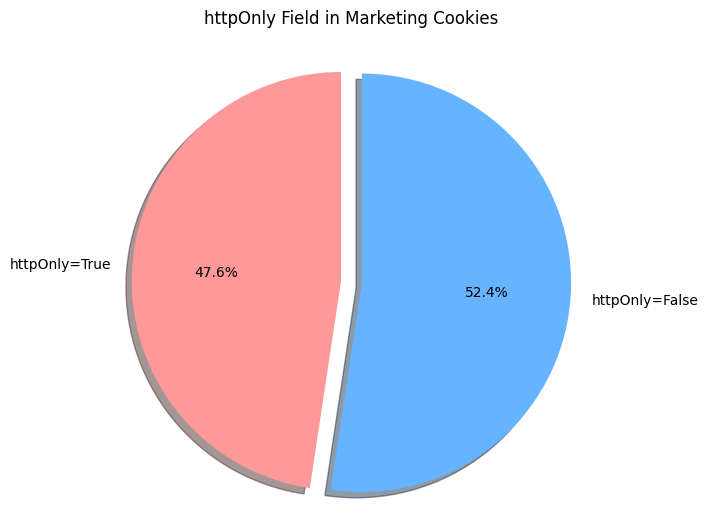

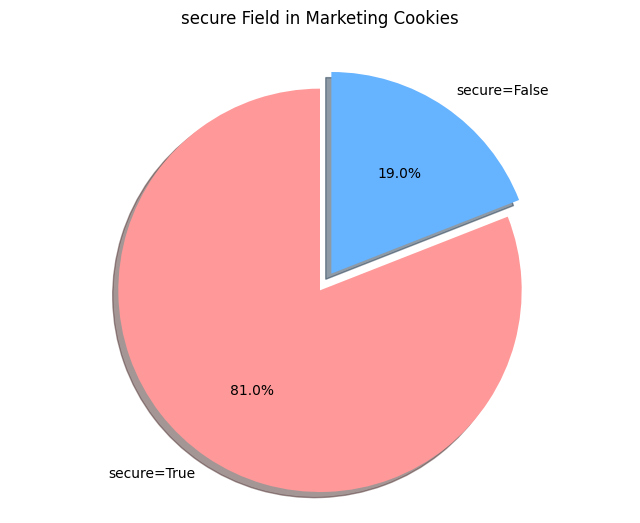

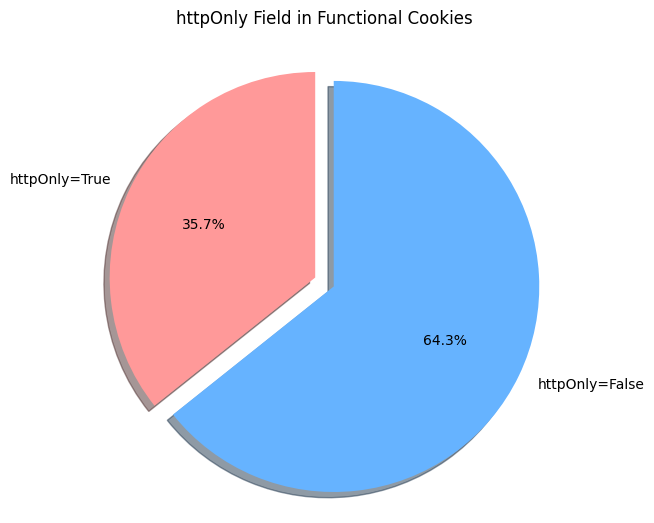

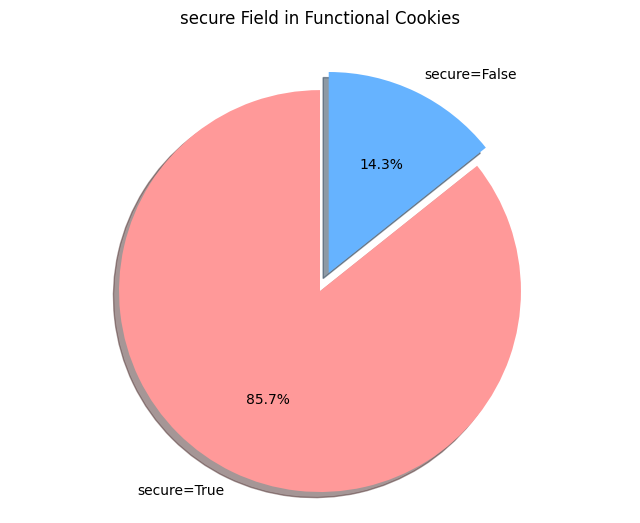

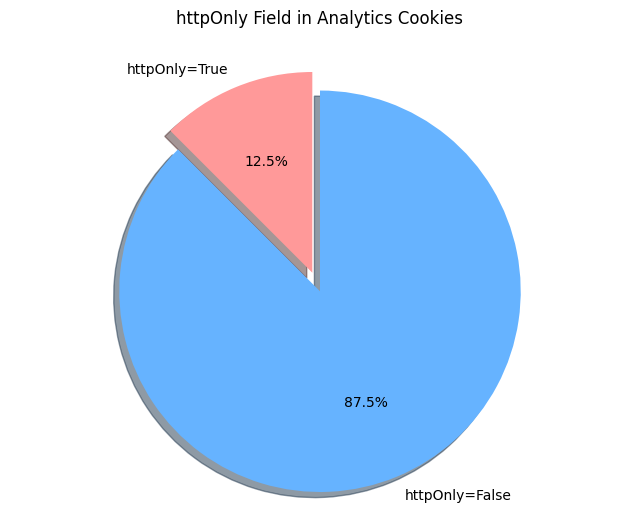

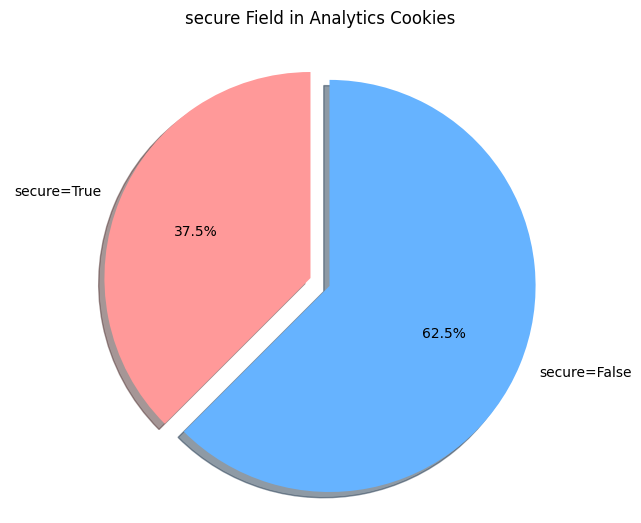

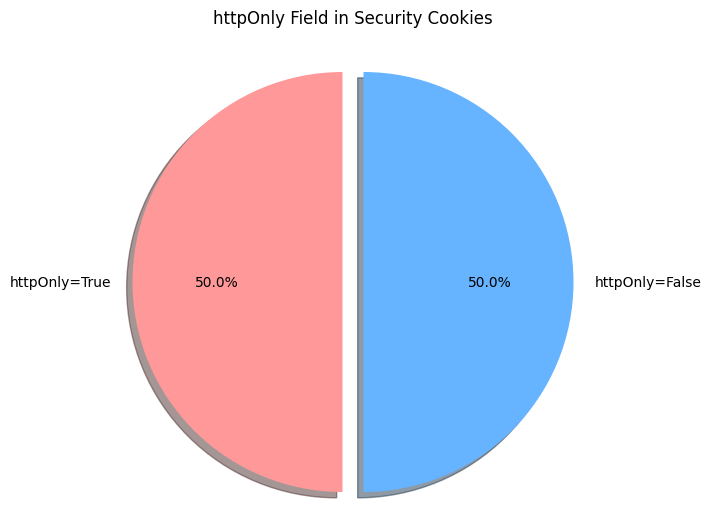

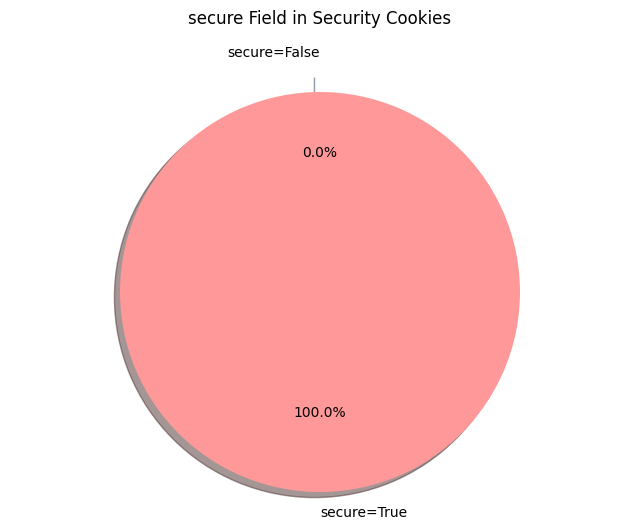

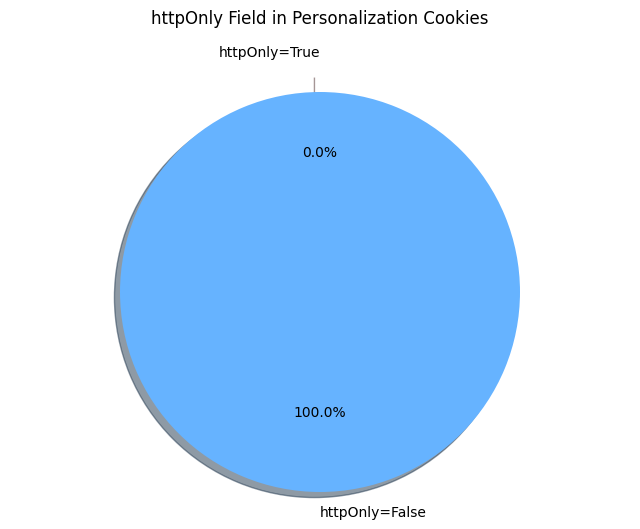

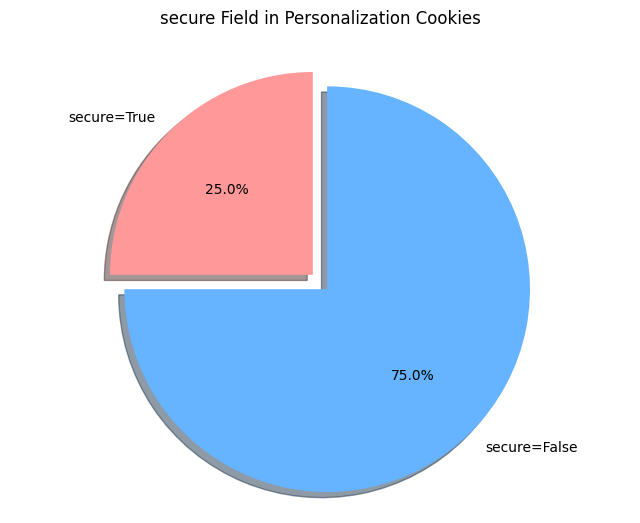

In [17]:
def get_field_histogram_for_cookie_of(cookie_type: str, field: str) -> None:
    with open("output.json", "r") as file:
        data = json.load(file)
    #  Count httpOnly values for marketing cookies
    http_only_counts = {"True": 0, "False": 0}

    for domain, cookies in data.items():
        if not isinstance(cookies, list):
            continue
        for cookie in cookies:
            if cookie.get("classification") == cookie_type:
                if cookie.get(field, False):
                    http_only_counts["True"] += 1
                else:
                    http_only_counts["False"] += 1

    # Prepare data for pie chart
    labels = [f"{field}=True", f"{field}=False"]
    sizes = [http_only_counts["True"], http_only_counts["False"]]
    colors = ["#ff9999", "#66b3ff"]
    explode = (0.1, 0)  # explode the first slice

    # Create pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(
        sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        shadow=True,
        startangle=90,
    )
    plt.axis("equal")  # Equal aspect ratio ensures pie is drawn as a circle
    plt.title(f"{field} Field in {cookie_type} Cookies", pad=20)

    # Show the plot
    plt.show()


for cookie_type in {
    "Marketing",
    "Personalization",
    "Functional",
    "Analytics",
    "Security",
}:
    for field in ["httpOnly", "secure"]:
        get_field_histogram_for_cookie_of(cookie_type=cookie_type, field=field)